In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
movies = pd.read_csv('tmdb_movies.csv')

In [4]:
genres = pd.read_csv('tmdb_genres.csv')

In [5]:
movies.rename(columns={'Unnamed: 0':'Id'}, inplace=True)

In [6]:
movies.set_index('Id', inplace=True)

In [7]:
genres.rename(columns={'Unnamed: 0':'Id'}, inplace=True)

In [8]:
genres.set_index('Id', inplace=True)

In [9]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,genre_id
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4775.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,634.411309
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,2415.010323
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,12.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,18.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,28.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,35.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,10770.000000


In [107]:
genres.describe()

,genres
count,20
unique,20
top,Action
freq,1


In [10]:
movies['vote_count'].median()

235.0

In [11]:
movies['vote_count'].quantile(q = 0.75)

737.0

In [22]:
movies_zad1 = movies[movies['vote_count'] > movies['vote_count'].quantile(q=0.75)].sort_values(by='vote_average',ascending=False, ignore_index=True)[:10]

In [23]:
movies_zad1

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,25000000,NaN,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,1994-09-23,28341469,142.0,Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,18.0
1,6000000,http://www.thegodfather.com/,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,1972-03-14,245066411,175.0,Released,An offer you can't refuse.,The Godfather,8.4,5893,18.0
2,15000000,http://movies.disney.com/spirited-away,129,ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,2001-07-20,274925095,125.0,Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,8.3,3840,14.0
3,3300000,http://sonyclassics.com/whiplash/,244786,en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,2014-10-10,13092000,105.0,Released,The road to greatness can take you to the edge.,Whiplash,8.3,4254,18.0
4,13000000,NaN,240,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,105.792936,1974-12-20,47542841,200.0,Released,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,8.3,3338,18.0
5,8000000,NaN,680,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,1994-10-08,213928762,154.0,Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,53.0
6,22000000,http://www.schindlerslist.com/,424,en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,1993-11-29,321365567,195.0,Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,4329,18.0
7,63000000,http://www.foxmovies.com/movies/fight-club,550,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,1999-10-15,100853753,139.0,Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,18.0
8,806948,NaN,539,en,Psycho,When larcenous real estate clerk Marion Crane ...,93.067866,1960-06-16,32000000,109.0,Released,The master of suspense moves his cameras into ...,Psycho,8.2,2320,18.0
9,25000000,http://www.warnerbros.com/goodfellas,769,en,GoodFellas,"The true story of Henry Hill, a half-Irish, ha...",63.654244,1990-09-12,46836394,145.0,Released,Three Decades of Life in the Mafia.,GoodFellas,8.2,3128,18.0


In [37]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [104]:
movies_group = movies.groupby(pd.Grouper(key='release_date', freq='Y')).mean()['2010-12-31':][:'2016-12-31']

In [102]:
def million(x, pos):
        return '{:2.1f}M'.format(x*1e-6)

In [105]:
movies_group2 = movies_group.reset_index()

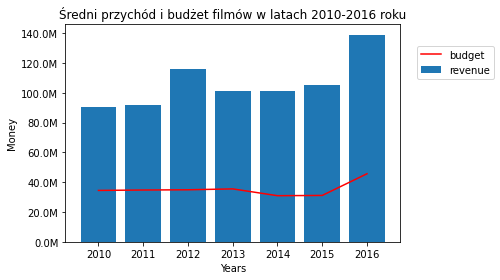

In [106]:
fig, ax = plt.subplots()

years = pd.DatetimeIndex(movies_group2['release_date']).year
budget = movies_group2['budget']
revenue = movies_group2['revenue']

formatter = plt.FuncFormatter(million)
ax.yaxis.set_major_formatter(formatter)

ax.bar(years, revenue, label='revenue')

ax.plot(years, budget, label='budget', color='red')

ax.legend(loc=(1.05,0.75))
ax.set_xlabel('Years')
ax.set_ylabel('Money')
ax.set_title('Średni przychód i budżet filmów w latach 2010-2016 roku')

plt.show()

In [111]:
movies_g = movies.join(genres,on='genre_id')

In [135]:
movies_g['genres'].value_counts()

Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: genres, dtype: int64

In [136]:
movies_g2 = movies_g.groupby('genres').mean().sort_values(by='runtime',ascending=False).iloc[0]
movies_g2

budget          2.440340e+07
id              7.737924e+04
popularity      1.903479e+01
revenue         7.277602e+07
runtime         1.339600e+02
vote_average    6.628000e+00
vote_count      5.727600e+02
genre_id        3.600000e+01
Name: History, dtype: float64

In [147]:
movies_gh = movies_g[movies_g['genres']=='History']

<AxesSubplot:>

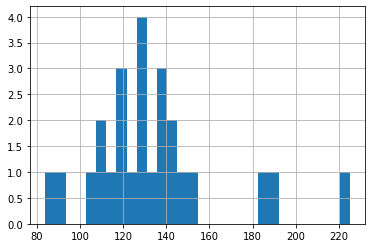

In [149]:
movies_gh['runtime'].hist(bins=30)